In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('real_estate_cleaned.csv')
df

,City,Locality,Property Type,Price,Furnishing Status,Number of Rooms,Number of Bathroom,Balcony,Clubhouse,Swimming Pool,Kids Play Areas,Parking,Area (Sq.Ft.),State,Area Type
0,Ahmedabad,Makarba,Residential,11500000.0,Furnished,3,3.0,Individual,0,0,0.0,2,1715.0,Gujarat,Built-up Area
1,Ahmedabad,Makarba,Residential,6500000.0,Unfurnished,2,2.0,Connected,0,0,1.0,1,1050.0,Gujarat,Saleable Area
2,Ahmedabad,Ambli Road,Residential,72100000.0,Semi-Furnished,5,5.0,Connected,0,0,0.0,4,4083.0,Gujarat,Carpet Area
3,Ahmedabad,Shela,Residential,13000000.0,Unfurnished,5,5.0,Connected,0,0,1.0,4,3100.0,Gujarat,Built-up Area
4,Ahmedabad,Bodakdev,Residential,15000000.0,Furnished,5,4.0,Room-attached,0,0,0.0,1,1800.0,Gujarat,Built-up Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32095,Vijayawada,Patamata,Residential,14900000.0,Semi-Furnished,3,3.0,Connected,0,0,NaN,1,2403.0,Andhra Pradesh,Saleable Area
32096,Vijayawada,Mutyalammapadu,Residential,9411599.0,Semi-Furnished,3,3.0,Individual,0,0,NaN,1,1400.0,Andhra Pradesh,Built-up Area
32097,Vijayawada,Kesarapalli,Residential,7500000.0,Furnished,2,2.0,Connected,0,0,NaN,4,1250.0,Andhra Pradesh,Built-up Area
32098,Vijayawada,Kesarapalli,Residential,4499000.0,Unfurnished,2,2.0,Room-attached,1,1,NaN,2,1266.0,Andhra Pradesh,Saleable Area


In [5]:
df.columns

Index(['City', 'Locality', 'Property Type', 'Price', 'Furnishing Status',
       'Number of Rooms', 'Number of Bathroom', 'Balcony', 'Clubhouse',
       'Swimming Pool', 'Kids Play Areas', 'Parking', 'Area (Sq.Ft.)', 'State',
       'Area Type'],
      dtype='object')

In [7]:
s = df['State'].unique()
s

array(['Gujarat', 'Karnatka', 'Chandigarh', 'Tamil Nadu', 'Delhi',
       'Haryana', 'Telangana', 'Rajasthan', 'West Bengal',
       'Uttar Pradesh', 'Maharashtra', 'Bihar', 'Andhra Pradesh'],
      dtype=object)

In [9]:

#  Convert Price and Area  to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Handle non-numeric values
df['Area (Sq.Ft.)'] = pd.to_numeric(df['Area (Sq.Ft.)'], errors='coerce')
df.dropna(inplace=True) #drop rows after conversion to numeric

In [11]:

df['Price_per_sqft'] = df['Price'] / df['Area (Sq.Ft.)']

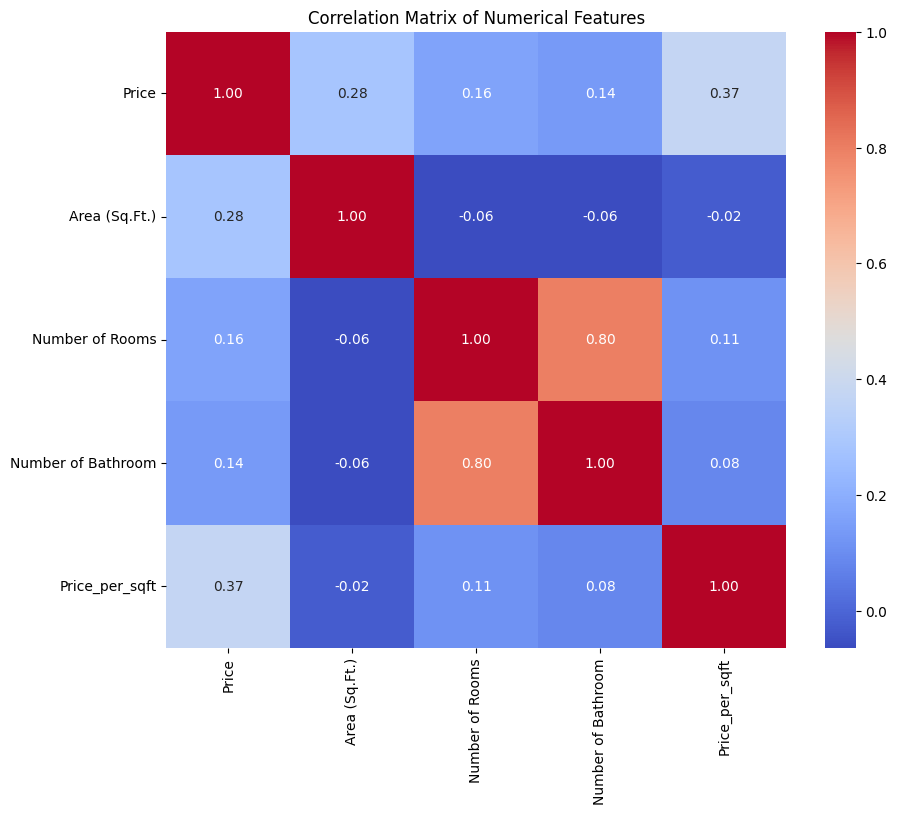

In [13]:
correlation_matrix = df[['Price', 'Area (Sq.Ft.)', 'Number of Rooms', 'Number of Bathroom', 'Price_per_sqft']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

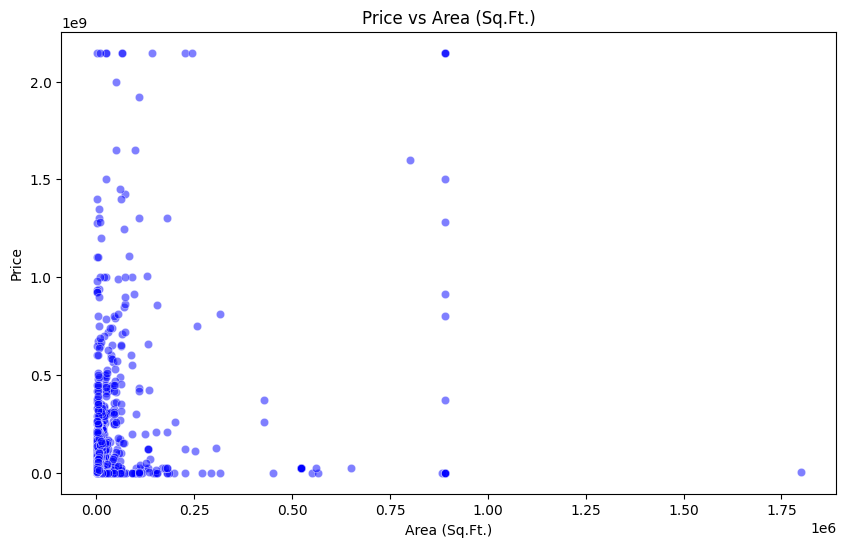

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Area (Sq.Ft.)'], y=df['Price'], alpha=0.5, color="blue")
plt.title("Price vs Area (Sq.Ft.)")
plt.xlabel("Area (Sq.Ft.)")
plt.ylabel("Price")
plt.show()

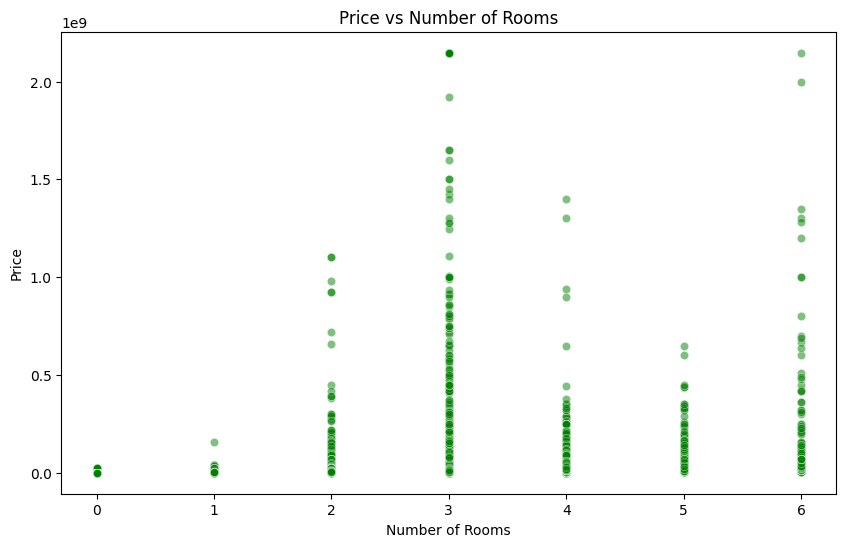

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Number of Rooms'], y=df['Price'], alpha=0.5, color="green")
plt.title("Price vs Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.show()


C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\3688281365.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Property Type', y='Price', data=df, ci=None)  # ci=None to remove error bars


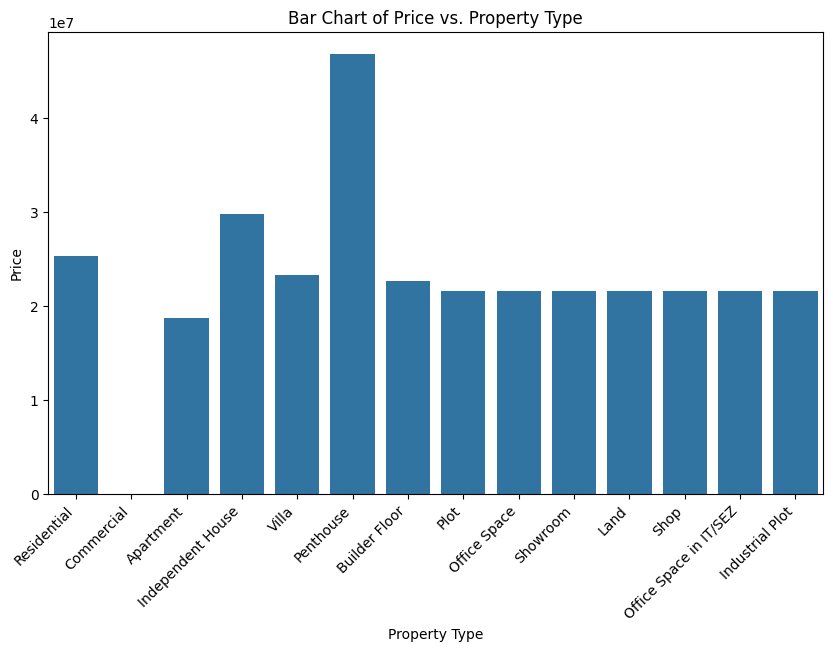

In [19]:
# Price vs. Property Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Property Type', y='Price', data=df, ci=None)  # ci=None to remove error bars
plt.title('Bar Chart of Price vs. Property Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\821123897.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Furnishing Status', y='Price', data=df, ci=None)


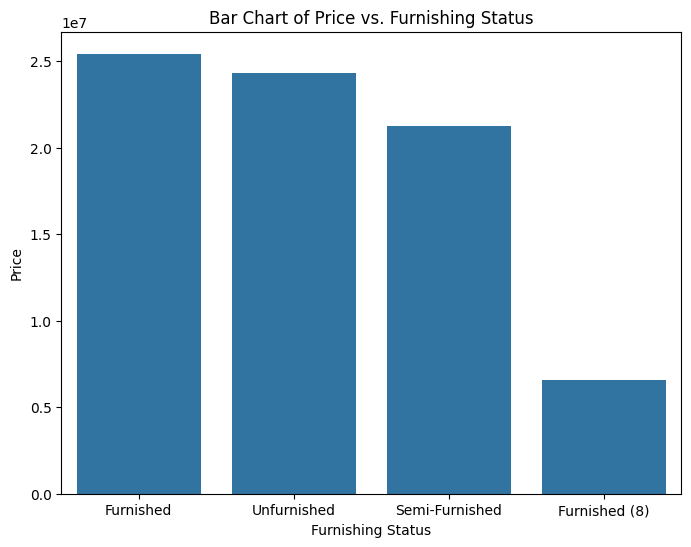

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Furnishing Status', y='Price', data=df, ci=None)
plt.title('Bar Chart of Price vs. Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

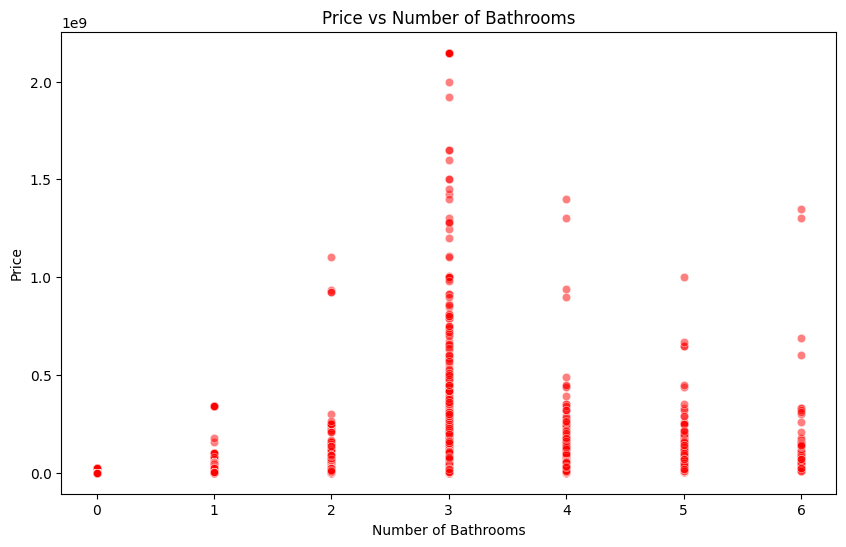

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Number of Bathroom'], y=df['Price'], alpha=0.5, color="red")
plt.title("Price vs Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.show()

C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\2871823156.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Property Type'], y=df['Price'], estimator=lambda x: x.mean(), ci=None, palette="coolwarm")
C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\2871823156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Property Type'], y=df['Price'], estimator=lambda x: x.mean(), ci=None, palette="coolwarm")


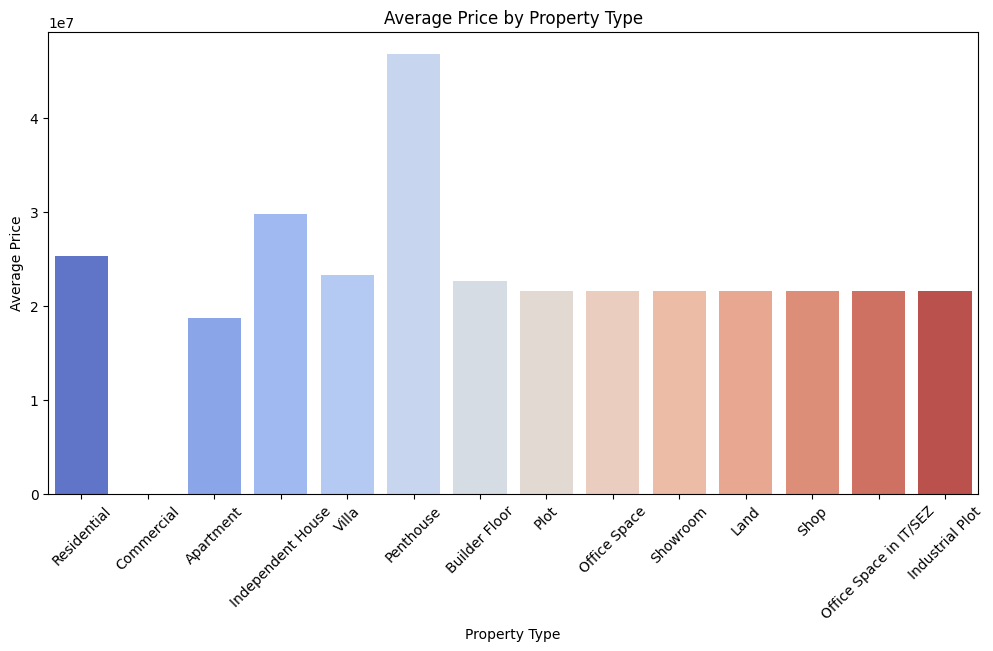

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Property Type'], y=df['Price'], estimator=lambda x: x.mean(), ci=None, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Price")
plt.show()

C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\3795825268.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Furnishing Status'], y=df['Price'], estimator=lambda x: x.mean(), ci=None, palette="viridis")
C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\3795825268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Furnishing Status'], y=df['Price'], estimator=lambda x: x.mean(), ci=None, palette="viridis")


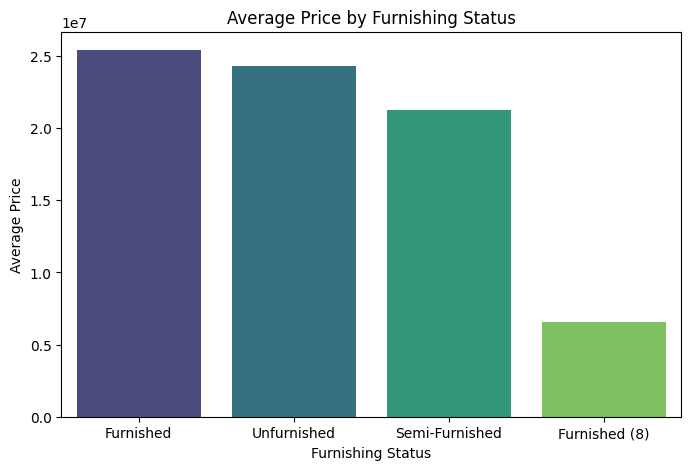

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Furnishing Status'], y=df['Price'], estimator=lambda x: x.mean(), ci=None, palette="viridis")
plt.title("Average Price by Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Average Price")
plt.show()

C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\3249970320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['State'], y=df['Price'], palette="pastel")


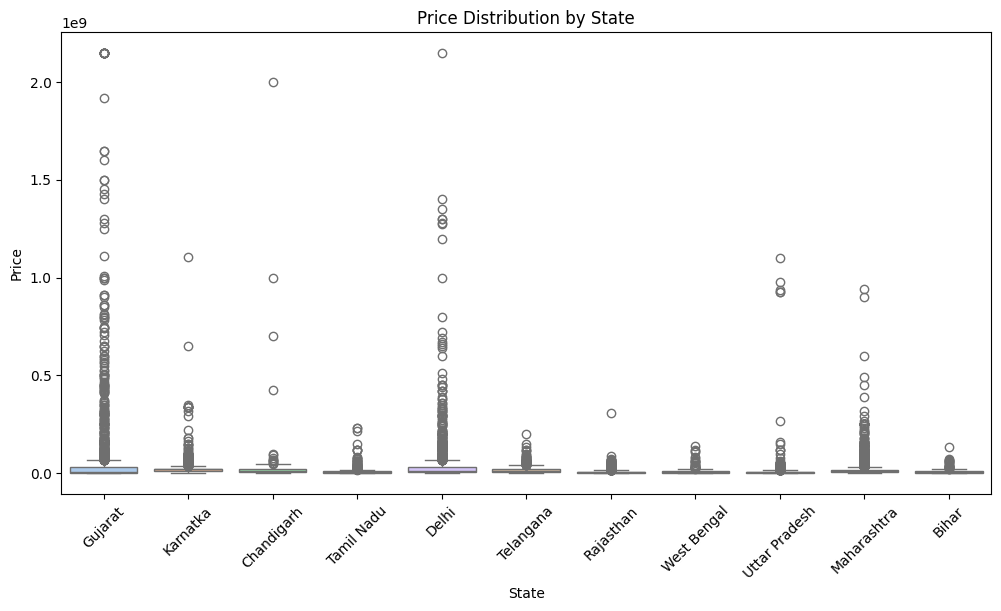

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['State'], y=df['Price'], palette="pastel")
plt.xticks(rotation=45)
plt.title("Price Distribution by State")
plt.xlabel("State")
plt.ylabel("Price")
plt.show()

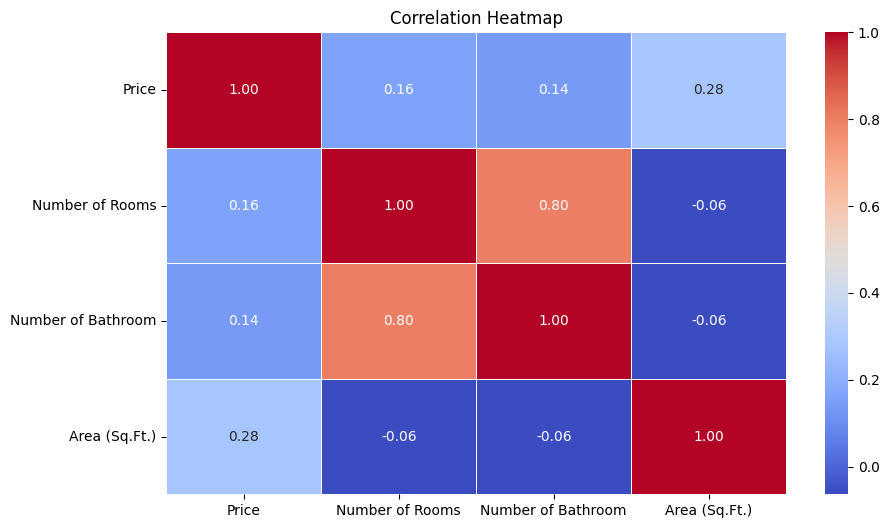

In [31]:
# Heatmap Correlation between Numerical Features
plt.figure(figsize=(10, 6))
corr_matrix = df[['Price', 'Number of Rooms', 'Number of Bathroom',  'Area (Sq.Ft.)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


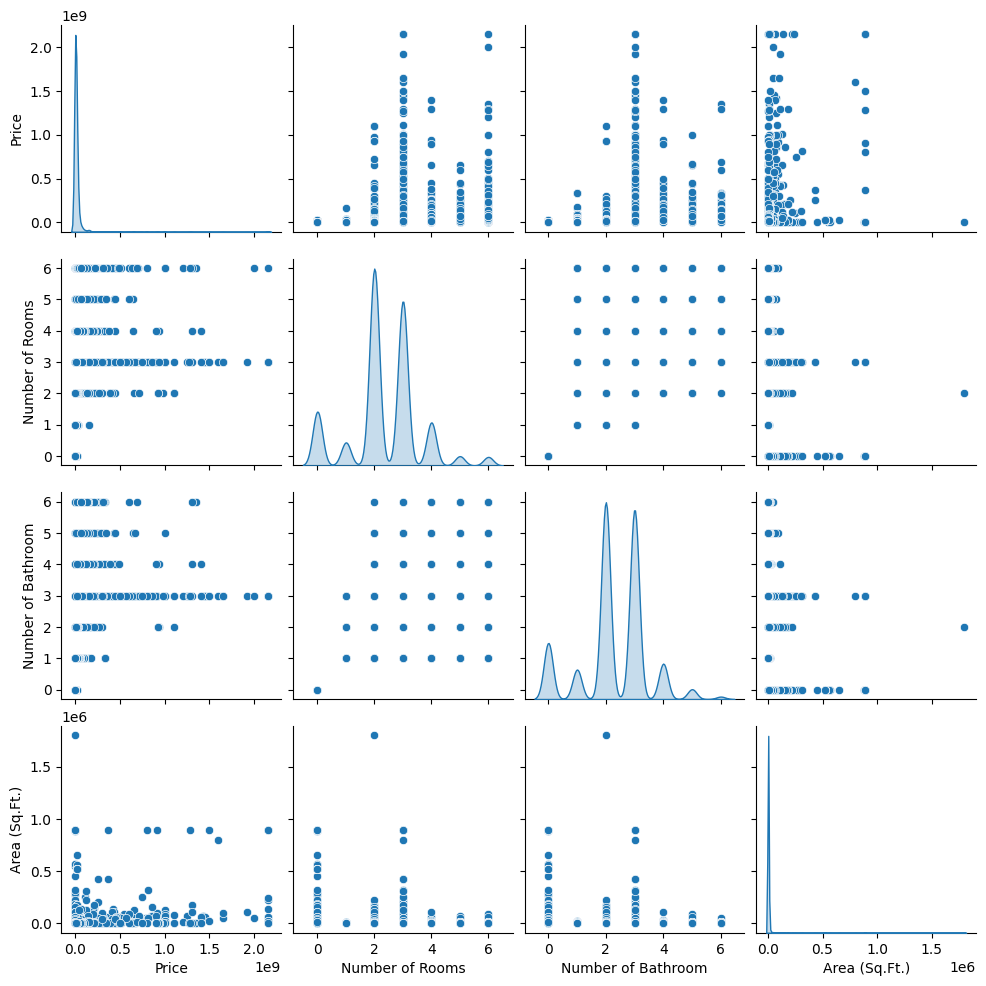

In [33]:

# Pairplot Pairwise relationships between numerical variables
sns.pairplot(df[['Price', 'Number of Rooms', 'Number of Bathroom', 'Area (Sq.Ft.)']], diag_kind='kde')
plt.show()


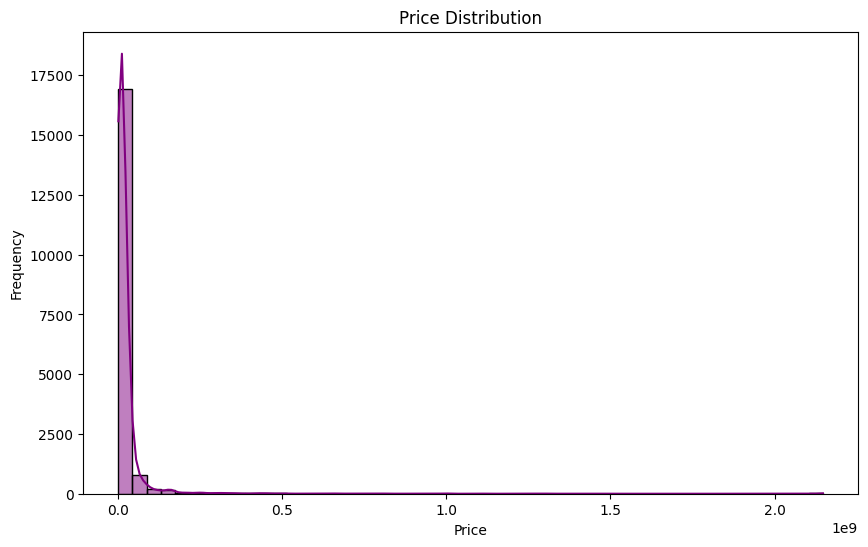

In [34]:
# Histogram: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='purple')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


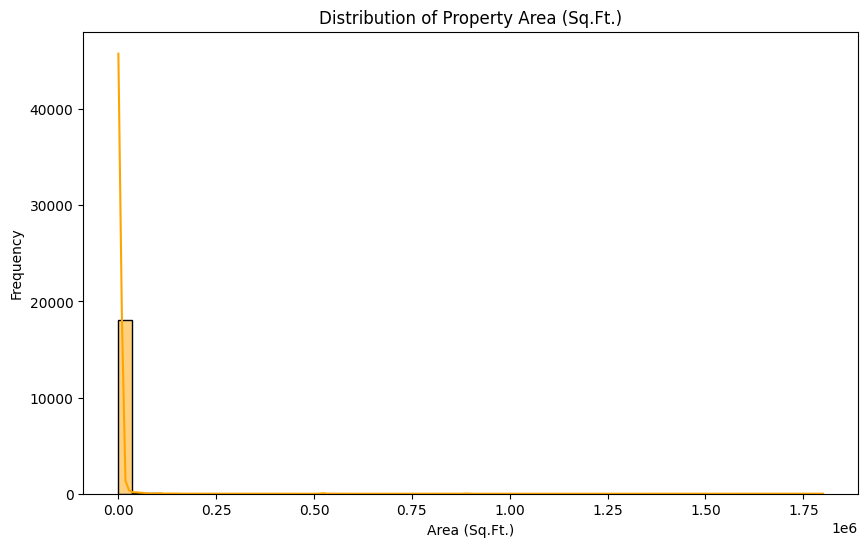

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Area (Sq.Ft.)'], bins=50, kde=True, color='orange')
plt.title("Distribution of Property Area (Sq.Ft.)")
plt.xlabel("Area (Sq.Ft.)")
plt.ylabel("Frequency")
plt.show()


C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\2402366868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Property Type'], palette="viridis")


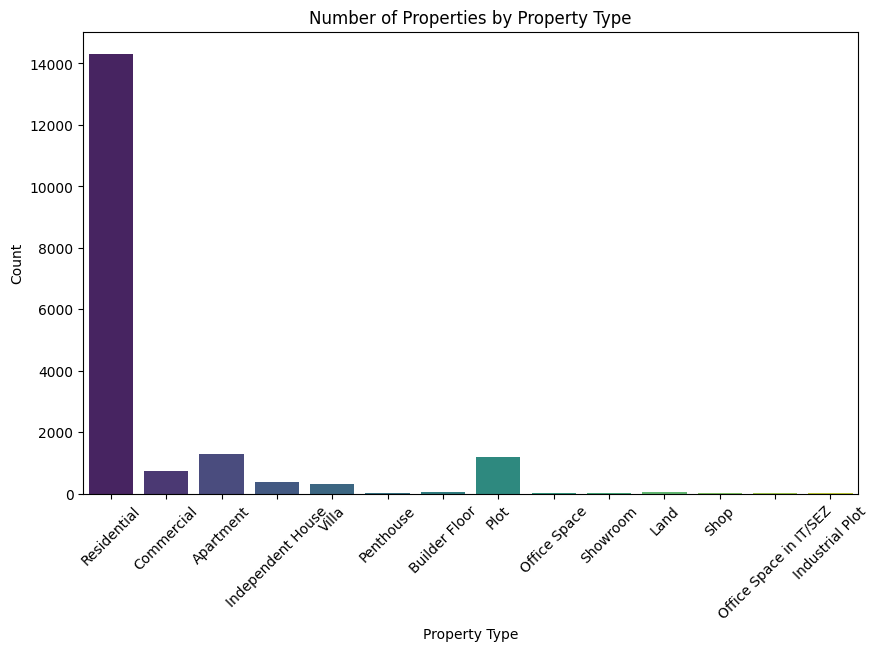

In [36]:
# Count Plot: Number of Properties by Property Type
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Property Type'], palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Properties by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.show()

C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\1168335998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Furnishing Status'], palette="pastel")


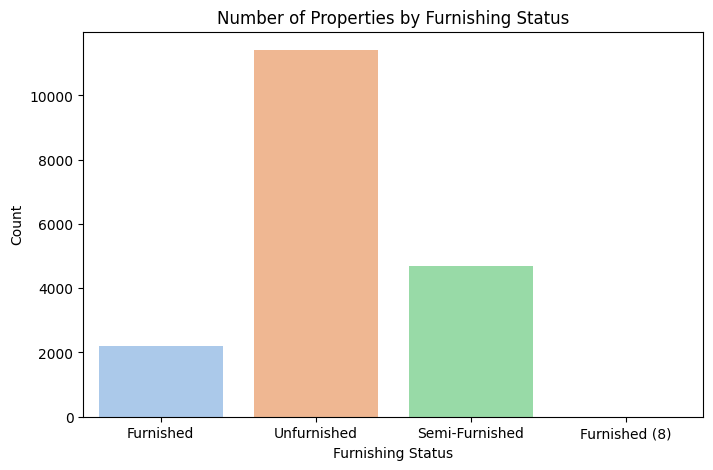

In [37]:
# Count Plot: Number of Properties by Furnishing Status
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Furnishing Status'], palette="pastel")
plt.title("Number of Properties by Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.show()


C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\2599778457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['State'], y=df['Price'], palette="pastel")


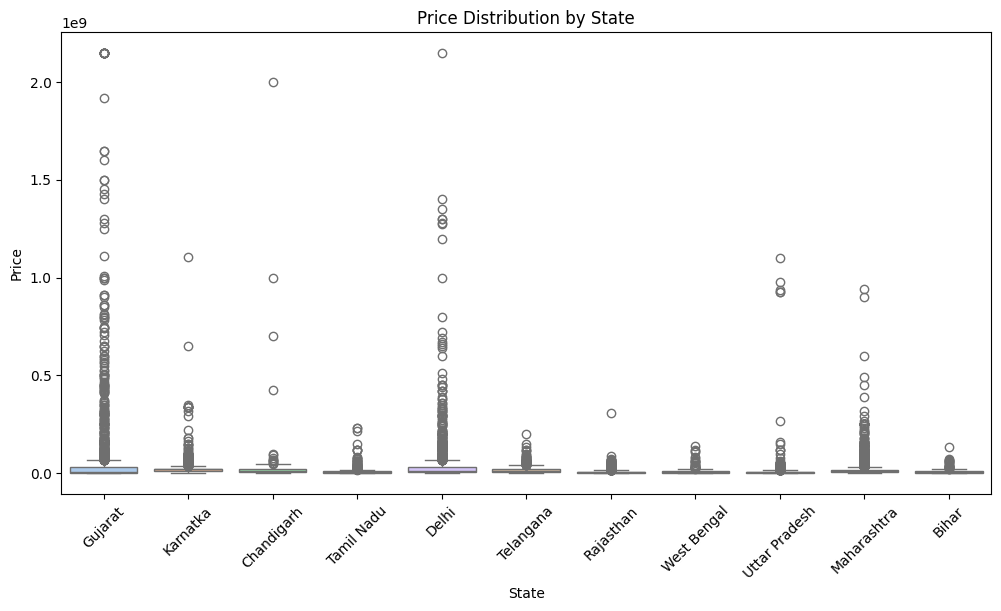

In [38]:
# Boxplot: Price Distribution by State
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['State'], y=df['Price'], palette="pastel")
plt.xticks(rotation=45)
plt.title("Price Distribution by State")
plt.xlabel("State")
plt.ylabel("Price")
plt.show()

C:\Users\Malhar\AppData\Local\Temp\ipykernel_6288\412319632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Area Type'], y=df['Price'], palette="coolwarm")


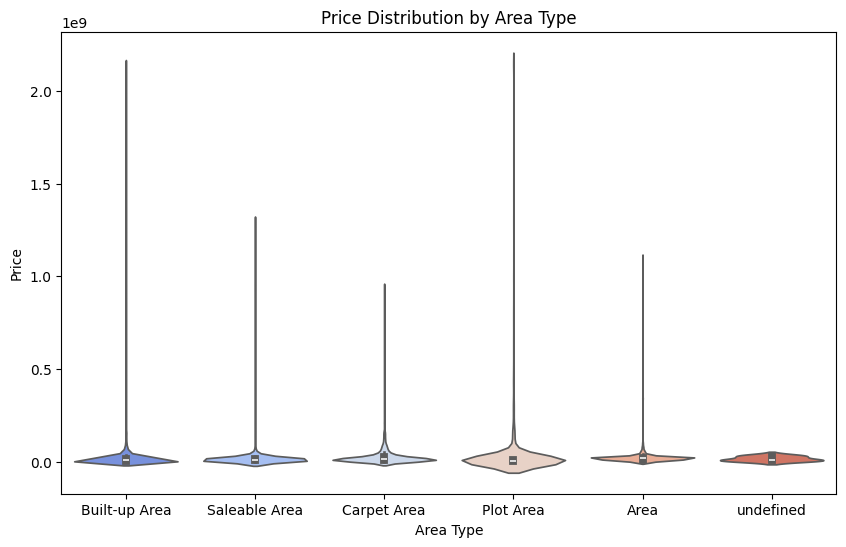

In [41]:
# Violin Plot: Price Distribution by Area Type
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Area Type'], y=df['Price'], palette="coolwarm")
plt.title("Price Distribution by Area Type")
plt.xlabel("Area Type")
plt.ylabel("Price")
plt.show()


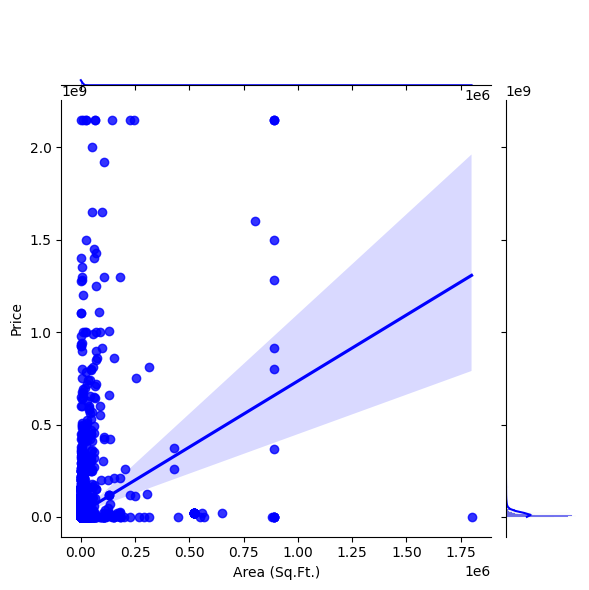

In [44]:
# Joint Plot: Price vs. Area
sns.jointplot(x=df['Area (Sq.Ft.)'], y=df['Price'], kind="reg", color="blue")
plt.show()


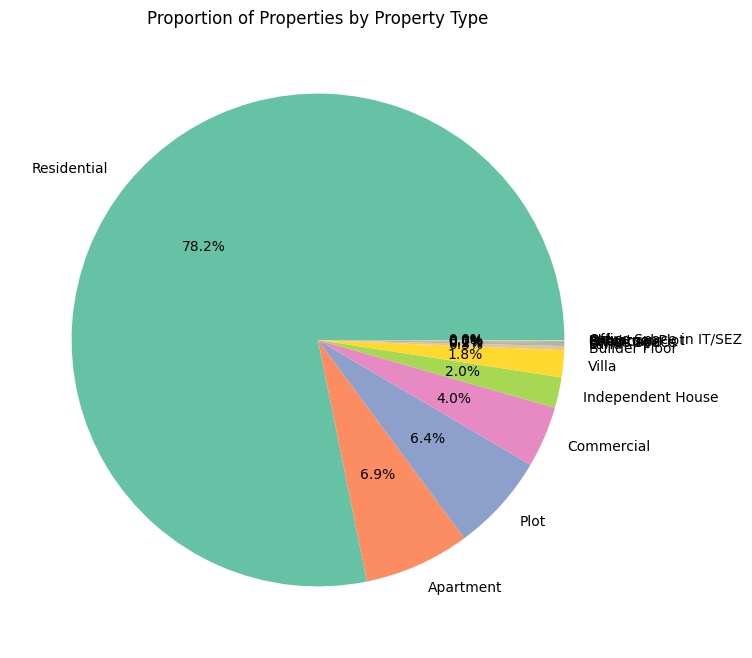

In [47]:

# Pie Chart: Proportion of Properties by Property Type
plt.figure(figsize=(8, 8))
df['Property Type'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Proportion of Properties by Property Type")
plt.ylabel("")
plt.show()

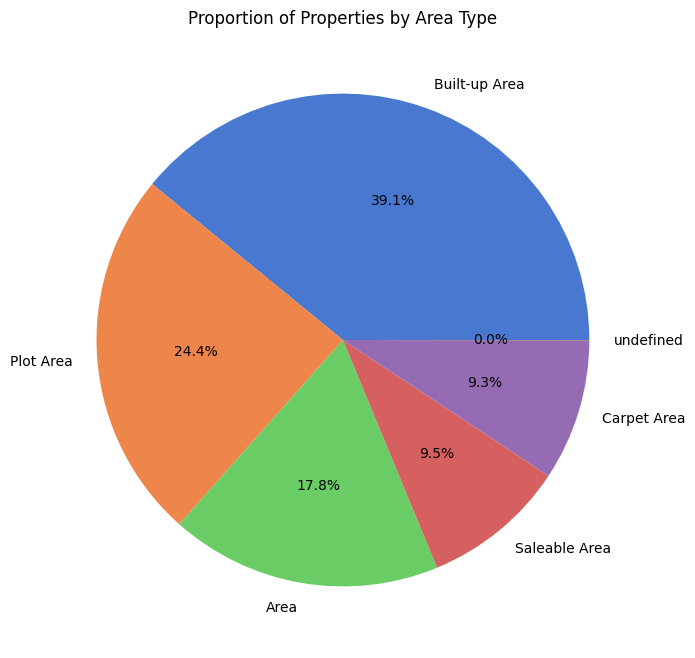

In [49]:
# Pie Chart: Proportion of Properties by Area Type
plt.figure(figsize=(8, 8))
df['Area Type'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("muted"))
plt.title("Proportion of Properties by Area Type")
plt.ylabel("")
plt.show()

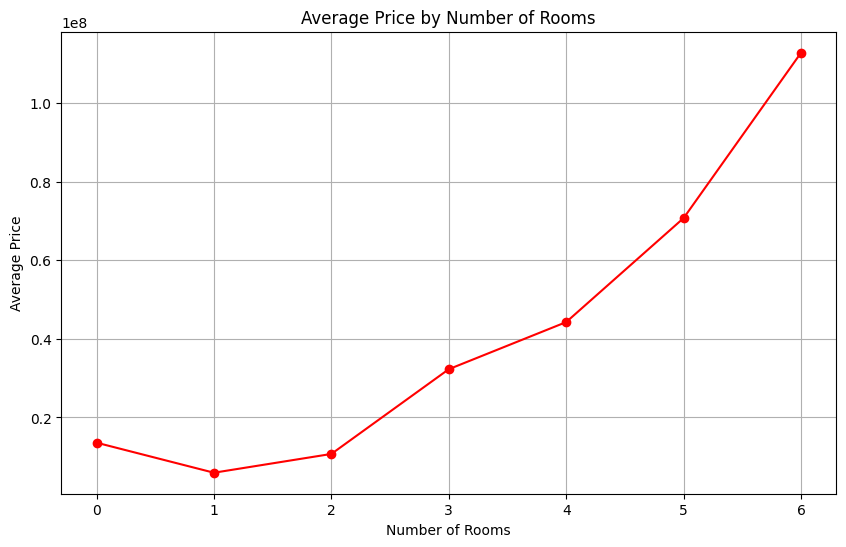

In [50]:
# Line Chart: Average Price by Number of Rooms
room_prices = df.groupby('Number of Rooms')['Price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(room_prices.index, room_prices.values, marker="o", linestyle="-", color="red")
plt.title("Average Price by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()
